## Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline


In [2]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

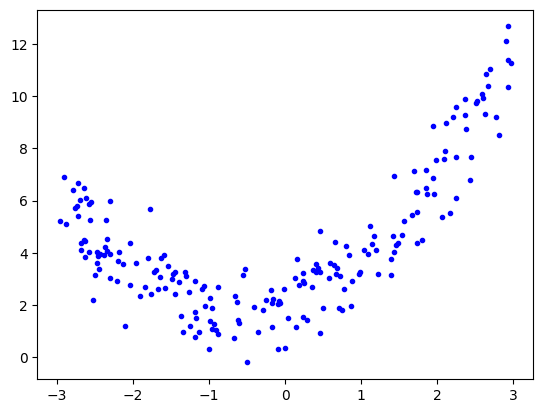

In [3]:
plt.plot(X, y, 'b.')

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
lr = LinearRegression()
lr.fit(x_train.reshape(-1, 1), y_train)
y_pred = lr.predict(x_test.reshape(-1, 1))

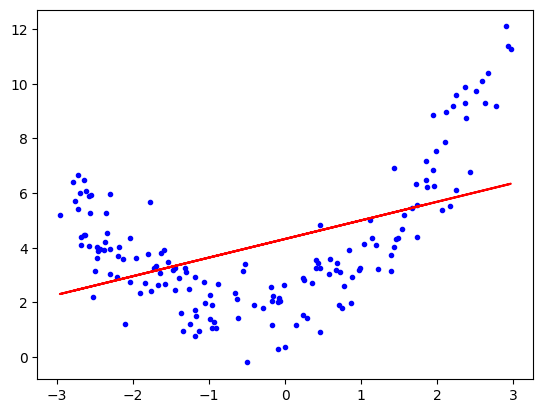

In [6]:
plt.plot(x_train, y_train, 'b.')
plt.plot(x_train, lr.predict(x_train.reshape(-1, 1)), 'r')

In [7]:
r2_score(y_test, y_pred)

0.3210417285832168

Polynomial Feature

In [8]:
poly = PolynomialFeatures(degree=2)
x_train_trans = poly.fit_transform(x_train.reshape(-1, 1))
x_test_trans = poly.fit_transform(x_test.reshape(-1, 1))

# include_bias parameter True or False
# skip the first row x^0 term

In [9]:
print(x_train[0])
print(x_train_trans[0])

[-2.76352823]
[ 1.         -2.76352823  7.63708829]


In [10]:
lr2 = LinearRegression()
lr2.fit(x_train_trans, y_train)

LinearRegression()

In [11]:
pred2 = lr2.predict(x_test_trans)
print('Polynomial: ',r2_score(y_test, pred2))
print('Linear: ',r2_score(y_test, y_pred))

Polynomial:  0.9086944990084062
Linear:  0.3210417285832168


In [12]:
lr2.coef_

array([[0.        , 0.88558364, 0.77593603]])

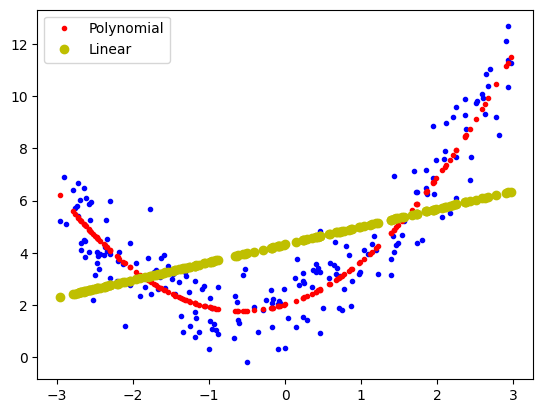

In [13]:
plt.plot(X, y, 'b.')
plt.plot(x_train, lr2.predict(x_train_trans), 'r.', label ='Polynomial')
plt.plot(x_train, lr.predict(x_train.reshape(-1, 1)), 'yo', label='Linear')
plt.legend()
plt.show()


In [14]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1156: RuntimeWarning: overflow encountered in square
  temp **= 2
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


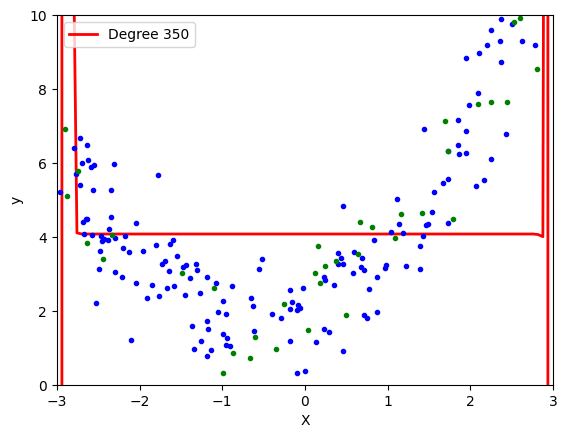

In [15]:
polynomial_regression(degree=350)

### 3D polynomial

In [ ]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2
df = pd.DataFrame(x)
df.columns = ['x']
df['y'] = y
df['z'] = z

In [18]:
import plotly.express as px

In [25]:
fig = px.scatter_3d(df, x='x', y='y', z='z')
fig.show()

In [48]:
lr = LinearRegression()
lr.fit(np.array([x, y]).reshape(100, 2), z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input, y_input)
final = np.vstack((xGrid.ravel().reshape(1, 100), yGrid.ravel().reshape(1, 100))).T

z_final = lr.predict(final).reshape(10, 10)

In [52]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x='x', y='y', z='z')
fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final))
fig.show()


In [ ]:
poly = PolynomialFeatures(degree=2)
x_multi = np.array([x, y]).reshape(100, 2)
x_multi_trans = poly.fit_transform(x_multi)

In [ ]:
print('poly.n_features_in_',poly.n_features_in_)
print('poly.n_output_features_',poly.n_output_features_)
print('poly.n_output_features_\n',poly.powers_)

# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

# Powers represent terms
# [[0 0] --> 2
#  [1 0] --> 0.2x
#  [0 1] --> 0.2y
#  [2 0] --> x^2
#  [1 1] --> 0.1xy
#  [0 2] --> y^2

poly.n_features_in_ 2
poly.n_output_features_ 6
poly.n_output_features_
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [60]:
lr = LinearRegression()
lr.fit(x_multi_trans, z)

LinearRegression()

In [61]:
x_test_multi = poly.transform(final)

In [62]:
z_final = lr.predict(x_multi_trans).reshape(10, 10)

In [63]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))
fig.show()